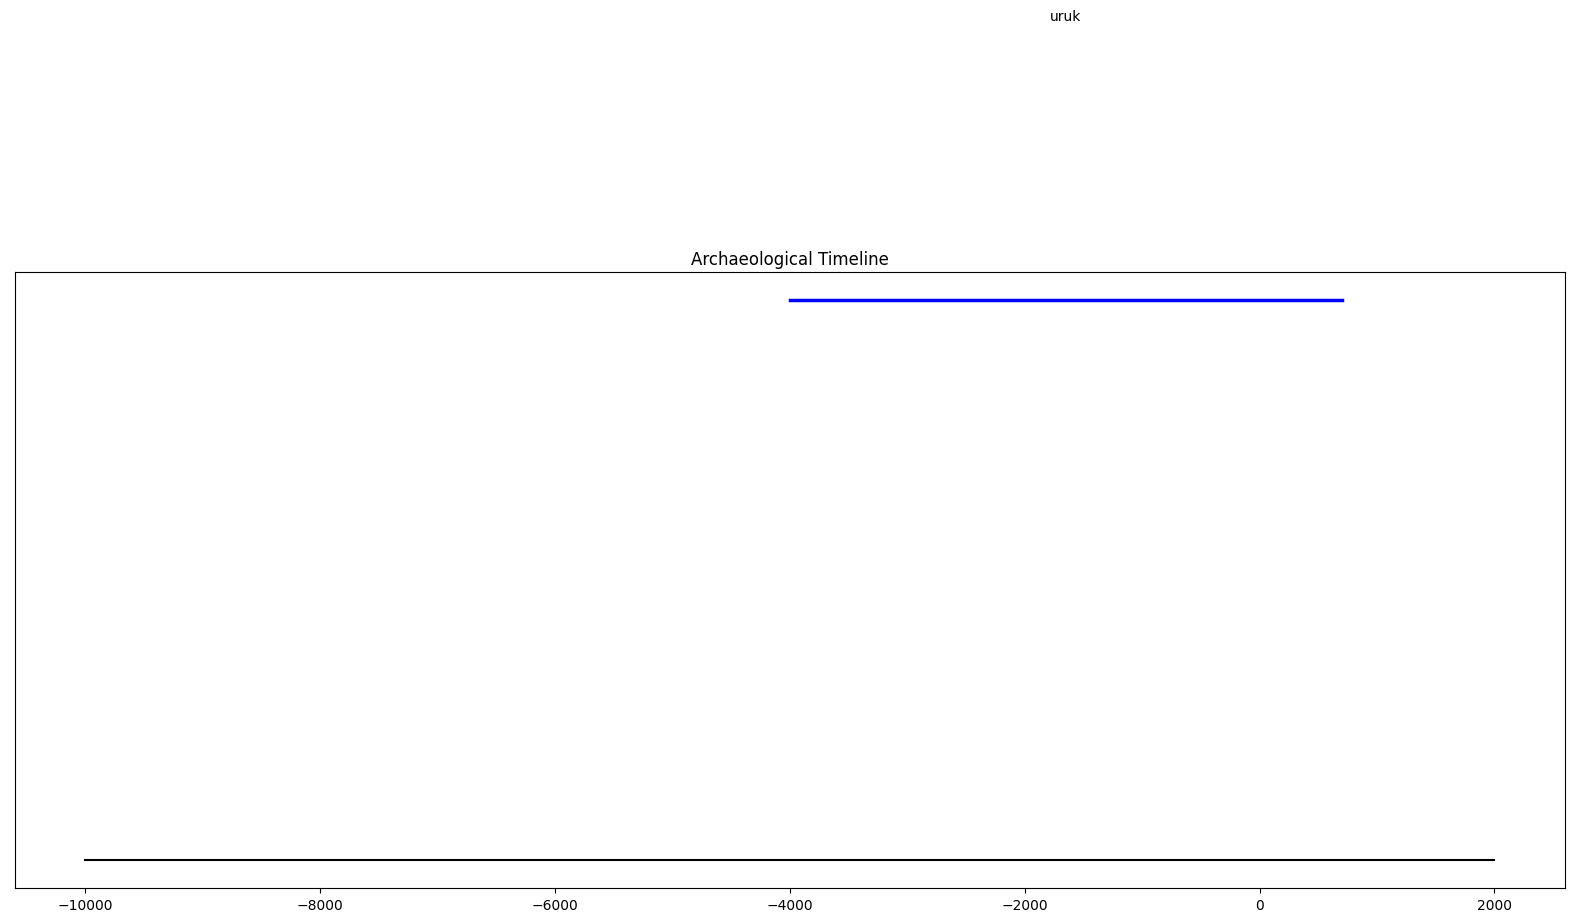

IntText(value=-10000, description='Start Time (BC/AD):')

IntText(value=2000, description='End Time (BC/AD):')

Label(value='Add Events:')

Text(value='', description='Event Name:')

IntText(value=0, description='Event Time:')

Button(description='Add Event', style=ButtonStyle())

Label(value='Add Periods:')

Text(value='', description='Period Name:')

IntText(value=0, description='Start Time:')

IntText(value=0, description='End Time:')

Button(description='Add Period', style=ButtonStyle())

Button(description='Plot Timeline', style=ButtonStyle())

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# UI Components
start_time = widgets.IntText(value=-10000, description='Start Time (BC/AD):')
end_time = widgets.IntText(value=2000, description='End Time (BC/AD):')

# Event input
event_name = widgets.Text(description='Event Name:')
event_time = widgets.IntText(description='Event Time:')
add_event_button = widgets.Button(description="Add Event")
events_list = []

# Period input
period_name = widgets.Text(description='Period Name:')
period_start_time = widgets.IntText(description='Start Time:')
period_end_time = widgets.IntText(description='End Time:')
add_period_button = widgets.Button(description="Add Period")
periods_list = []

# Actions on button click
def add_event(b):
    events_list.append((event_name.value, event_time.value))
    event_name.value = ''
    event_time.value = 0

def add_period(b):
    periods_list.append((period_name.value, period_start_time.value, period_end_time.value))
    period_name.value = ''
    period_start_time.value = 0
    period_end_time.value = 0

add_event_button.on_click(add_event)
add_period_button.on_click(add_period)

# Plotting button
plot_button = widgets.Button(description="Plot Timeline")

def plot_timeline(b):
    clear_output(wait=True)
    # Placeholder for plotting
    plt.figure(figsize=(20, 8))
    plt.title("Archaeological Timeline")
    plt.plot([start_time.value, end_time.value], [0, 0], color='black')  # Main timeline

    # Periods
    for period in periods_list:
        name, start, end = period
        plt.plot([start, end], [0.1, 0.1], color='blue', linewidth=2.5)
        mid = (start + end) / 2
        plt.text(mid, 0.15, name, horizontalalignment='center')
    
    # Events
    for event in events_list:
        name, time = event
        plt.plot(time, 1, 'ro')
        plt.text(time, 1.5, name, horizontalalignment='center')

    # Ticks every 1000 years
    #for year in range(start_time.value, end_time.value + 1, 1000):
        #plt.plot([year, year], [0, -0.5], color='black')
        #plt.text(year, -1, str(year), horizontalalignment='center', verticalalignment='top', fontsize=8)

    plt.yticks([])
    plt.show()
    
    display_ui()  # Re-display the UI after plotting

plot_button.on_click(plot_timeline)

# Function to display the entire UI
def display_ui():
    display(start_time, end_time)
    display(widgets.Label(value="Add Events:"))
    display(event_name, event_time, add_event_button)
    display(widgets.Label(value="Add Periods:"))
    display(period_name, period_start_time, period_end_time, add_period_button)
    display(plot_button)

# Display UI
display_ui()
